In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
MIN_DISTANCE = 0.000001  # mini error

In [3]:
def create_data(num):  # data num
    data1 = np.random.rand(2, num) * 1
    data2 = np.random.rand(2, num) * 1 + 3
    data3 = np.random.rand(2, num) * 1 + 1.5
    data = np.concatenate((data1, data2, data3), axis=1)
    x, y = data
    fig, ax = plt.subplots()
    scatter = ax.scatter(x, y)
    ax.grid(True)
    plt.show()
    return np.transpose(data,[1, 0])

In [4]:
def euclidean_dist(pointA, pointB):
    #计算pointA和pointB之间的欧式距离
    total = (pointA - pointB) * (pointA - pointB).T
    return math.sqrt(total)

In [5]:
def group_points(mean_shift_points):
    '''计算所属的类别
    input:  mean_shift_points(mat):漂移向量
    output: group_assignment(array):所属类别
    '''
    group_assignment = []
    m, n = np.shape(mean_shift_points)
    index = 0
    index_dict = {}
    for i in range(m):
        item = []
        for j in range(n):
            item.append(str(("%5.2f" % mean_shift_points[i, j])))

        item_1 = "_".join(item)
        if item_1 not in index_dict:
            index_dict[item_1] = index
            index += 1

    for i in range(m):
        item = []
        for j in range(n):
            item.append(str(("%5.2f" % mean_shift_points[i, j])))

        item_1 = "_".join(item)
        group_assignment.append(index_dict[item_1])

    return group_assignment

In [6]:
def gaussian_kernel(distance, bandwidth):
    m = np.shape(distance)[0]
    right = np.mat(np.zeros((m, 1)))
    for i in range(m):
        right[i, 0] = (-0.5 * distance[i] * distance[i].T) / (bandwidth * bandwidth)
        right[i, 0] = np.exp(right[i, 0])
    left = 1 / (bandwidth * math.sqrt(2 * math.pi))

    gaussian_val = left * right
    return gaussian_val

In [7]:
def shift_point(point, points, kernel_bandwidth):
    points = np.mat(points)
    m,n = np.shape(points)
    #计算距离
    point_distances = np.mat(np.zeros((m,1)))
    for i in range(m):
        point_distances[i, 0] = np.sqrt((point - points[i]) * (point - points[i]).T)

    #计算高斯核      
    point_weights = gaussian_kernel(point_distances, kernel_bandwidth)

    #计算分母
    all = 0.0
    for i in range(m):
        all += point_weights[i, 0]

    #均值偏移
    point_shifted = point_weights.T * points / all
    return point_shifted

In [8]:
def distance_to_group(point, group):
    min_distance = 10000.0
    for pt in group:
        dist = euclidean_dist(point, pt)
        if dist < min_distance:
            min_distance = dist
    return min_distance

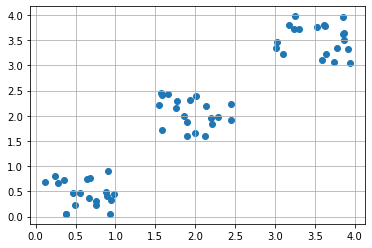

In [21]:
data = create_data(20)

In [22]:
points = data
kenel_bandwidth=0.3
mean_shift_points = np.mat(points)
max_min_dist = 1
iter = 0
m, n = np.shape(mean_shift_points)
need_shift = [True] * m

In [23]:
while max_min_dist > MIN_DISTANCE:
    max_min_dist = 0
    iter += 1
    print("iter:" + str(iter))
    for i in range(0, m):
        #判断每一个样本点是否需要计算偏置均值
        if not need_shift[i]:
            continue
        p_new = mean_shift_points[i]
        p_new_start = p_new
        p_new = shift_point(p_new, points, kenel_bandwidth)
        dist = euclidean_dist(p_new, p_new_start)

        if dist > max_min_dist:#record the max in all points
            max_min_dist = dist
        if dist < MIN_DISTANCE:#no need to move
            need_shift[i] = False

        mean_shift_points[i] = p_new

iter:1
iter:2
iter:3
iter:4
iter:5
iter:6
iter:7
iter:8
iter:9


In [25]:
group = group_points(mean_shift_points)

In [26]:
print(group)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [ ]:
fig, ax = plt.subplots()
scatter = ax.scatter(x, y)
ax.grid(True)
plt.show()

In [ ]:
x = np.squeeze(shift_points[:, 0].getA())
y = np.squeeze(shift_points[:, 1].getA())
fig, ax = plt.subplots()
scatter = ax.scatter(x, y)
ax.grid(True)
plt.show()